In [1]:
import numpy as np 

from scipy.integrate import solve_ivp

from pylab import cm
import matplotlib as mpl
import matplotlib.pyplot as plt 

mpl.style.use('seaborn')

from functools import partial 
from tqdm import tqdm 
 
tqdm = partial(tqdm, position=0, leave=True)


In [41]:
def f_rot(x, y): 
    return (y**3 + x**2*y - y - x) / (x*y**2+x**3+y-x)

def f_rot2(y, x): 
    return (y**3 + x**2*y - y - x) / (x*y**2+x**3+y-x)


def f_rot_edelman(x, y): 
     return (y + x * (x**2 + y**2)) / (x - y * (x**2 + y**2))

def f_rot_edelman_dxdy(x, y): 
     return (x - y * (x**2 + y**2)) / (y + x * (x**2 + y**2)) 

In [46]:
x, y = np.linspace(-2., 2., 35), np.linspace(-2., 2., 35) 
X, Y = np.meshgrid(x, y) 

dYdX = f_rot(X, Y) 
#dYdX = f_rot_edelman_dxdy(X, Y)
U = (1. / (1. + dYdX**2) ** 0.5) * np.ones(Y.shape) 
V = (1. / (1. + dYdX**2) ** 0.5) * dYdX

/tmp/ipykernel_554614/283218635.py:2: RuntimeWarning: invalid value encountered in divide
  return (y**3 + x**2*y - y - x) / (x*y**2+x**3+y-x)


In [4]:
def single_solve(y0): 
    return solve_ivp(f_rot, t_span=[-2, 1], y0=[y0])

def single_solve_edelman(y0): 
    return solve_ivp(f_rot_edelman, t_span=[-2, 1], y0=[y0])

In [7]:
res = single_solve(-1)

resx, resy = res.t, res.y.flatten() 

Text(0, 0.5, 'y')

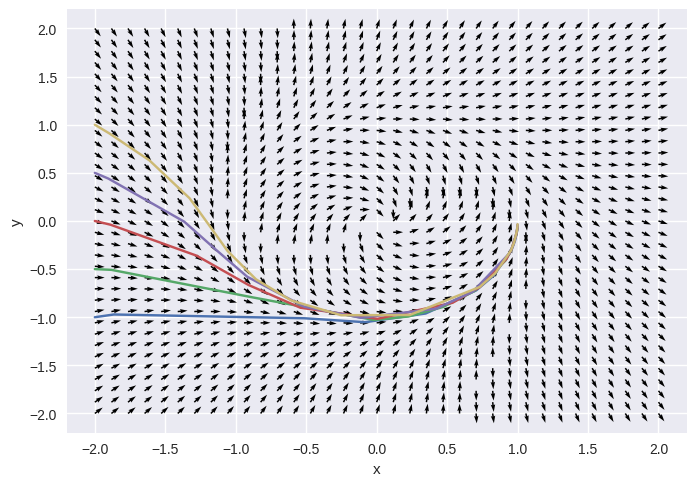

In [47]:
plt.quiver(X, Y, U, V, cmap='coolwarm')

y0s = np.linspace(-1., 1., 5)

for y0 in y0s: 
    #res = single_solve_edelman(y0)
    res = single_solve(y0) 
    resx, resy = res.t, res.y.flatten() 

    plt.plot(resx, resy)

#plt.title(r"Slope field for $\frac{dy}{dx} = \frac{y^3 + x^2y - y- x}{xy^2 + x^3 + y - x}  $")
plt.xlabel("x")
plt.ylabel('y')

In [28]:
def single_solve(y0): 
    return solve_ivp(f_rot, t_span=[-2, 1.], y0=[y0], t_eval=np.linspace(-2., 1., 20))

100%|██████████| 10/10 [00:00<00:00, 521.73it/s]


Text(0, 0.5, 'y')

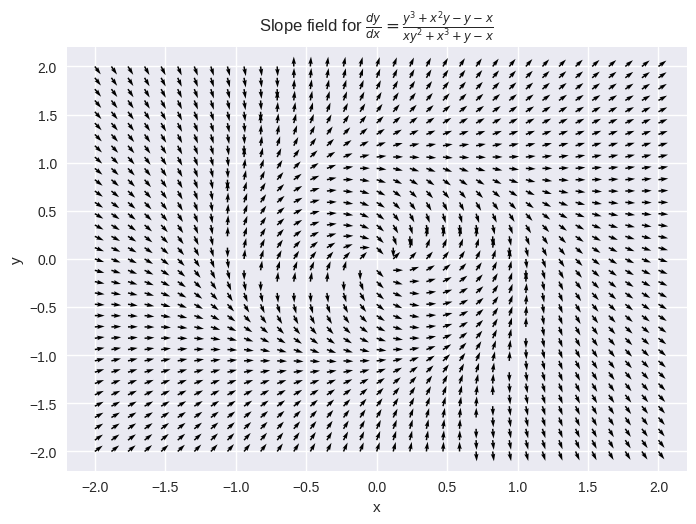

In [38]:
plt.quiver(X, Y, U, V, cmap='coolwarm')

Nsolve = 10

y0s = np.linspace(-2., 2., Nsolve)
#print(f"y0s = {y0s}")

rez = np.zeros([Nsolve, 20])
i = 0
for idx, y0 in enumerate(tqdm(y0s)):
    #print(f"at {idx+1}")
    res = single_solve(y0) 
    resx, resy = res.t, res.y.flatten() 
    #print(resy.shape)
    if resy.shape[0] == 20: 
        rez[i] = resy
    i += 1
    #plt.plot(resx,resy)

np.savez("ode10x20.npz", rez)

plt.title(r"Slope field for $\frac{dy}{dx} = \frac{y^3 + x^2y - y- x}{xy^2 + x^3 + y - x}  $")
plt.xlabel("x")
plt.ylabel('y')

 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.1000789577903D+01   r2 =  0.3046367618196D-16
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.1000789577903D+01   r2 =  0.3046367618196D-16
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.1000789577903D+01   r2 =  0.1336900511445D-16
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.1000789577903D+01   r2 =  0.4766879794145D-16
 lsoda--  warning..internal t (=r1) 

/home/ai/miniconda3/envs/pytorch/lib/python3.9/site-packages/scipy/integrate/_odepack_py.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


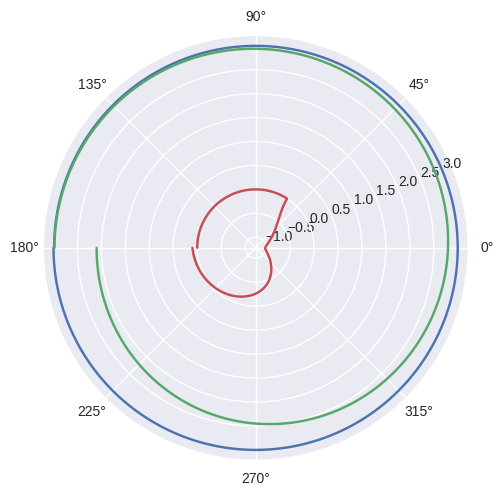

In [39]:
from scipy.integrate import odeint

def model1(y,t):
    dydt = -np.sqrt((y**4)*(1-1.2/(-3+2*y)-(27*(1-2/y)*(1- 
            1.2/(-3+2*y)))/(y**2)))/(3.*np.sqrt(3))
    return dydt

def model2(y,t):
    dydt = np.sqrt((y**4)*(1-1.2/(-3+2*y)-(27*(1-2/y)*(1-1.2/(-3+2*y)))/(y**2)))/(3.*np.sqrt(3))
    return dydt

# initial condition
y01 = 3-.0001
y02 = 2.1+0.0001
yrot  = 0.1
# time points
t = np.linspace(-np.pi,np.pi,1000)

# solve ODE
yd = odeint(model1,y01,t)
yc = odeint(model2,y02,t)
yrot = odeint(f_rot2, yrot, t)

# plot results
ax = plt.subplot(111, projection='polar')
ax.plot(t, yd)
ax.plot(t, yc)
ax.plot(t, yrot)
# plt.savefig('teste.png', dpi = 300, bbox_inches='tight')
plt.show()

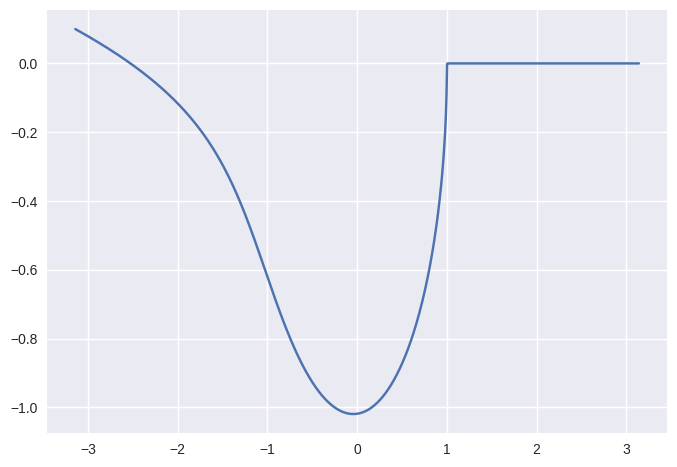

In [40]:
#plt.plot(t, yd)
#plt.plot(t, yc)
plt.plot(t, yrot)
